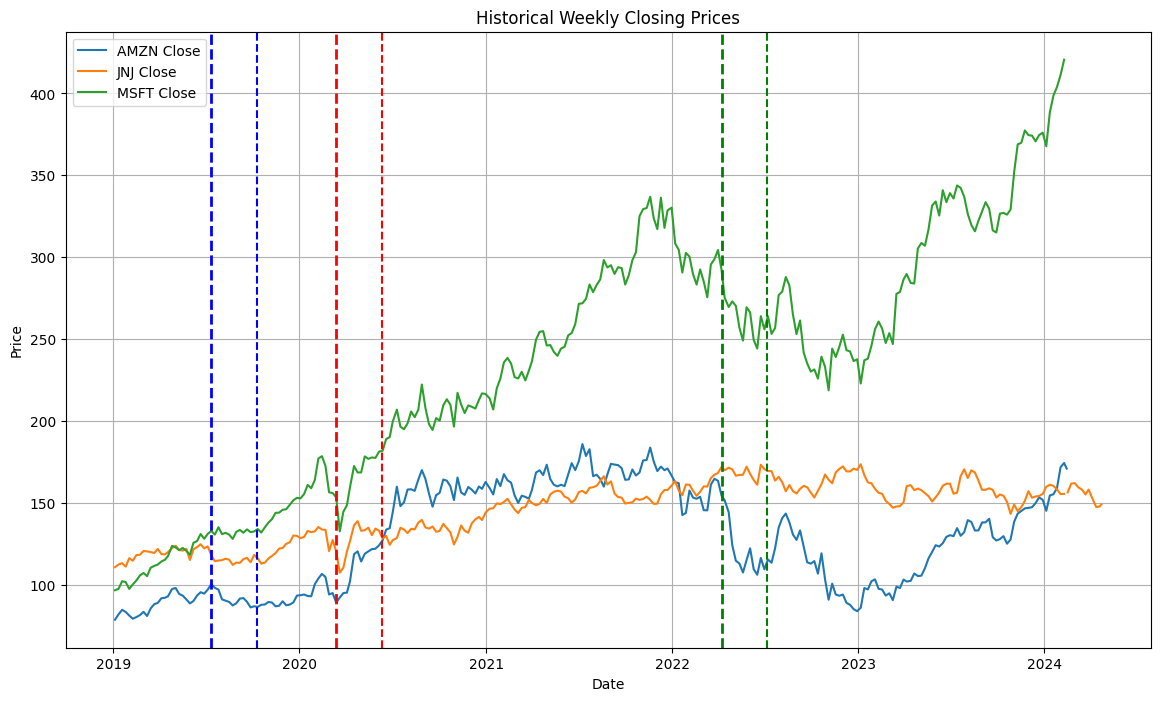

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
import os  # Importing os to check file existence

# Tickers to plot
tickers = ['AMZN', 'JNJ', 'MSFT']

# Base path pattern
base_path = './Weekly-Closing-Prices/{}_Pricing/{}_weekly_close.json'

date_limit = datetime.strptime('2019-01-01', '%Y-%m-%d')

# Initialize an empty DataFrame
df = pd.DataFrame()

# Load data for each ticker
for ticker in tickers:
    file_path = base_path.format(ticker, ticker)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue
    with open(file_path, 'r') as file:
        data = json.load(file)
        temp_df = pd.DataFrame(list(data.items()), columns=['Date', 'Close'])
        temp_df['Date'] = pd.to_datetime(temp_df['Date'])
        temp_df['Close'] = pd.to_numeric(temp_df['Close'])  # Ensure numeric type for 'Close'
        temp_df.rename(columns={'Close': f'{ticker}_Close'}, inplace=True)
        if df.empty:
            df = temp_df
        else:
            df = df.merge(temp_df, on='Date', how='outer')

# Sorting DataFrame by Date
df = df[df['Date'] >= date_limit]
df.sort_values('Date', inplace=True)


# Plotting the closing prices
plt.figure(figsize=(14, 8))
for ticker in tickers:
    if f'{ticker}_Close' in df.columns:
        plt.plot(df['Date'], df[f'{ticker}_Close'], label=f'{ticker} Close')

# Important dates and colors for vertical lines
dates = ['2020-03-12', '2019-07-12', '2022-04-08']
colors = ['red', 'blue', 'green']

for i, date_str in enumerate(dates):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    three_months_later = date + timedelta(days=90)
    plt.axvline(x=date, color=colors[i], linestyle='--', lw=2)
    plt.axvline(x=three_months_later, color=colors[i], linestyle='--')

# Adding legend and labels
plt.legend()
plt.title('Historical Weekly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()
